# Decision Tree
# Tiatnic Survival Dataset

# Import the Necessary Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


## Load the data sets- train and test 

In [3]:
df = pd.read_csv("train_titanic.csv")


In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
X=df.drop(df.columns[1],axis=1)
y=df["Survived"]
X


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
X = X.drop(["PassengerId", "Name", "Ticket"], axis = 1)
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,NaN,S
887,1,female,19.0,0,0,30.0000,B42,S
888,3,female,NaN,1,2,23.4500,NaN,S
889,1,male,26.0,0,0,30.0000,C148,C


## Print the number of missing values in each column of train and test data

In [8]:
# See missing values
X.isna().sum()


Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
# mean age
age = df["Age"]
age = age.dropna()
Sum = age.sum()
n = age.count()
mean_age = Sum/(n-177)
mean_age

39.48821229050279

In [10]:
# replace age missing value with mean age
X["Age"].fillna(X["Age"].mean(), inplace=True)

X

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.000000,1,0,7.2500,NaN,S
1,1,female,38.000000,1,0,71.2833,C85,C
2,3,female,26.000000,0,0,7.9250,NaN,S
3,1,female,35.000000,1,0,53.1000,C123,S
4,3,male,35.000000,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,NaN,S
887,1,female,19.000000,0,0,30.0000,B42,S
888,3,female,29.699118,1,2,23.4500,NaN,S
889,1,male,26.000000,0,0,30.0000,C148,C


In [11]:
# replace Cabin missing value with mode becaue it is labeled data
X["Cabin"].fillna(X["Cabin"].mode()[0], inplace=True)


In [12]:

# replace Embarked missing value with mode becaue it is labeled data
X["Embarked"].fillna(X["Embarked"].mode()[0], inplace=True)

In [13]:
X.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [14]:
# Split the data into traing and testing
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Look at top values of train data 

In [15]:
X_train.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
393,1,female,23.0,1,0,113.2750,D36,C
574,3,male,16.0,0,0,8.0500,B96 B98,S
635,2,female,28.0,0,0,13.0000,B96 B98,S
670,2,female,40.0,1,1,39.0000,B96 B98,S
550,1,male,17.0,0,2,110.8833,C70,C


In [16]:
y_train.head()

393    1
574    0
635    1
670    1
550    1
Name: Survived, dtype: int64

## Print the column names of train data

In [17]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'], dtype='object')

# Print the dimension of train and test data

In [18]:
print("dimensions of training data = ", X_train.shape)

dimensions of training data =  (712, 8)


In [19]:
print("dimensions of testing data = ", y_test.shape)

dimensions of testing data =  (179,)


# Print the number of missing values in each column of train and test data


In [20]:
X_train.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [21]:
x_test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [22]:
X_train.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [23]:
y_test.isna().sum()


0

# Data Visualization

## Barchart of Survived, Pclass, Sex, Embarked

Text(0.5, 1.0, 'non survived  and survied ')

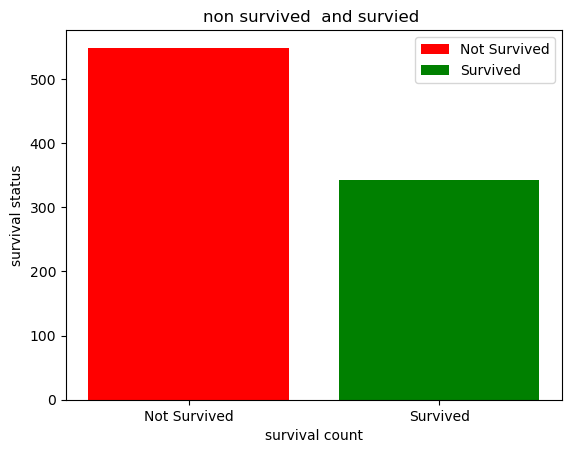

In [24]:
# bar graph of survival and non survial people
count = df["Survived"].value_counts()
plt.bar(count.index, count.values, color=["Red", "green"], label=["Not Survived", "Survived"])
plt.xlabel("survival count")
plt.ylabel("survival status")
plt.xticks([0, 1], ["Not Survived", "Survived"])
plt.legend()
plt.title("non survived  and survied ")

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


([<matplotlib.axis.XTick at 0x7d47ca259190>,
 [Text(3, 0, 'pclass-3'), Text(1, 0, 'pclass-1'), Text(2, 0, 'pclass-2')])

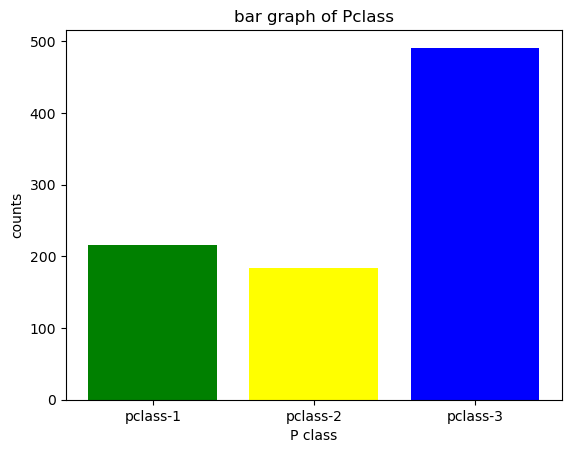

In [25]:
# bar graph of Pclass 
count = df["Pclass"].value_counts()
print(count)
plt.bar(count.index, count.values, color=["blue", "green", "yellow"])
plt.ylabel("counts")
plt.xlabel("P class")
plt.title("bar graph of Pclass")
plt.xticks([3, 1, 2], ["pclass-3", "pclass-1", "pclass-2"])

Sex
male      577
female    314
Name: count, dtype: int64


Text(0.5, 1.0, 'bar graph of Sex')

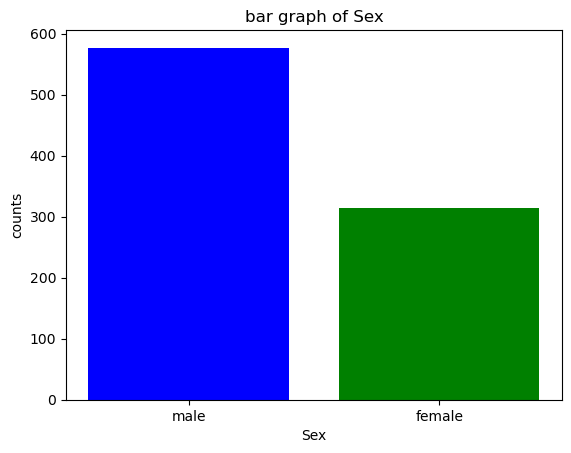

In [26]:
# bar graph of Sex 
count = df["Sex"].value_counts()
print(count)
plt.bar(count.index, count.values, color=["blue", "green", "yellow"])
plt.ylabel("counts")
plt.xlabel("Sex")
plt.title("bar graph of Sex")


Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


Text(0.5, 1.0, 'bar graph of Embarked')

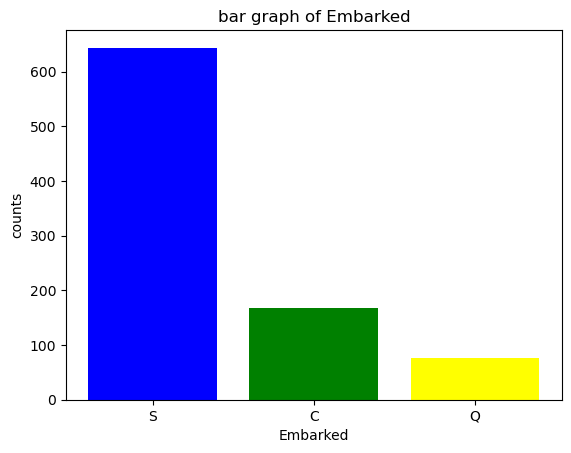

In [27]:
# bar graph of Embarked 
count = df["Embarked"].value_counts()
print(count)
plt.bar(count.index, count.values, color=["blue", "green", "yellow"])
plt.ylabel("counts")
plt.xlabel("Embarked")
plt.title("bar graph of Embarked")


## Histogram of Age, Parch, Fare

Text(0.5, 1.0, 'Histogram of Age')

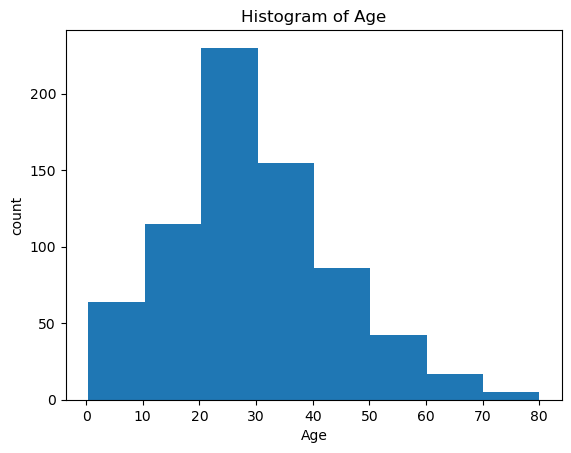

In [28]:
plt.hist(df["Age"],bins=8)
plt.ylabel("count")
plt.xlabel("Age")
plt.title("Histogram of Age")

Text(0.5, 1.0, 'Histogram of Fare')

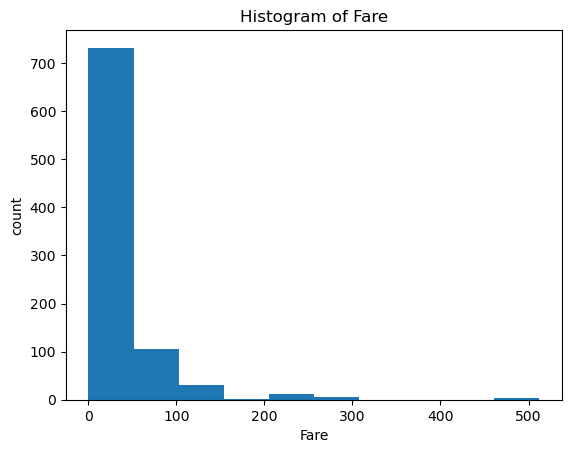

In [29]:
plt.hist(df["Fare"])
plt.ylabel("count")
plt.xlabel("Fare")
plt.title("Histogram of Fare")

Text(0.5, 1.0, 'Histogram of Fare')

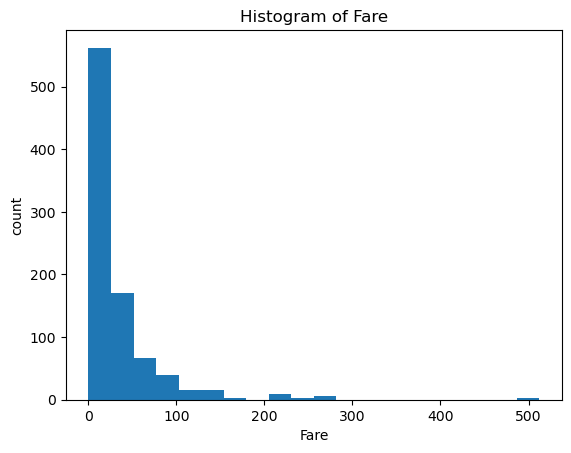

In [30]:
plt.hist(df["Fare"],bins=20)
plt.ylabel("count")
plt.xlabel("Fare")
plt.title("Histogram of Fare")

## Plot histogram of age for survived and did not survived class

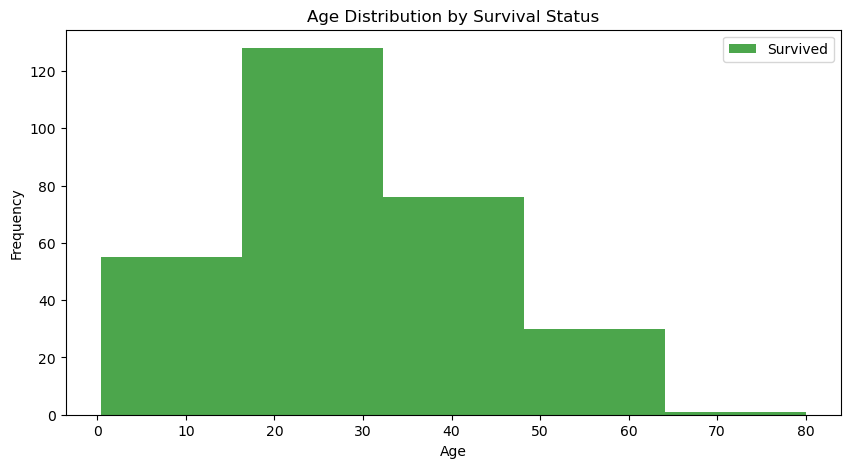

In [31]:
plt.figure(figsize=(10, 5))
plt.hist(df[df["Survived"] == 1]["Age"], bins=5, alpha=0.7, color="green", label="Survived")


# Labels and title
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution by Survival Status")
plt.legend()  # Show legend for Survived and Not Survived

# Show the plot
plt.show()

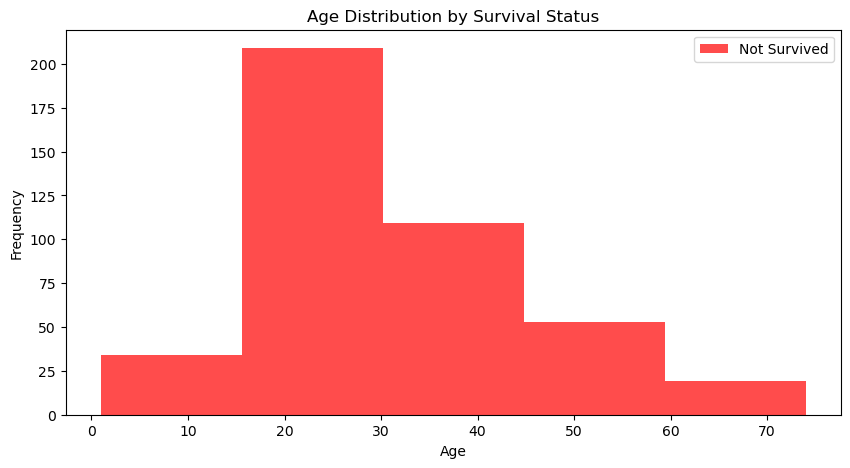

In [32]:
plt.figure(figsize=(10, 5))

plt.hist(df[df["Survived"] == 0]["Age"], bins=5, alpha=0.7, color="red", label="Not Survived")

# Labels and title
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution by Survival Status")
plt.legend()  # Show legend for Survived and Not Survived

# Show the plot
plt.show()

# Count class and gender wise survival rate - plot with appropriate chart


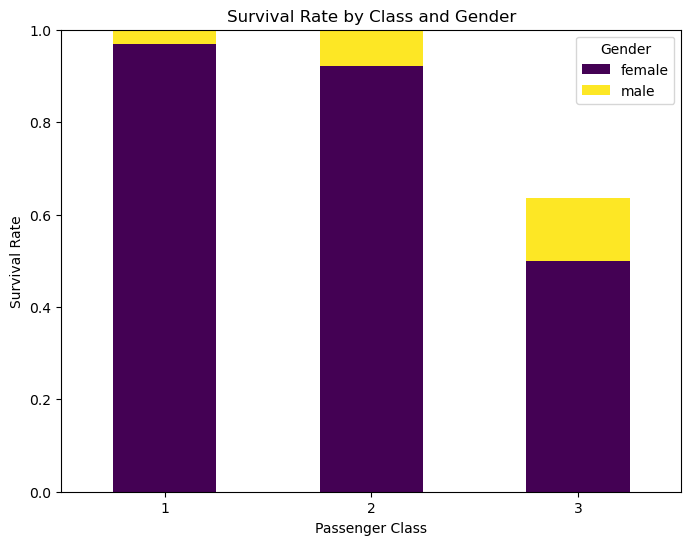

In [33]:
survival_rates = df.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack()

# Plotting
survival_rates.plot(kind='bar', stacked=True, colormap='viridis', figsize=(8, 6))
plt.title('Survival Rate by Class and Gender')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.xticks(rotation=0)
plt.legend(title="Gender")
plt.ylim(0, 1)  # Survival rate ranges from 0 to 1

# Show plot
plt.show()

# Age wise Distribution of Male and Female passengers

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


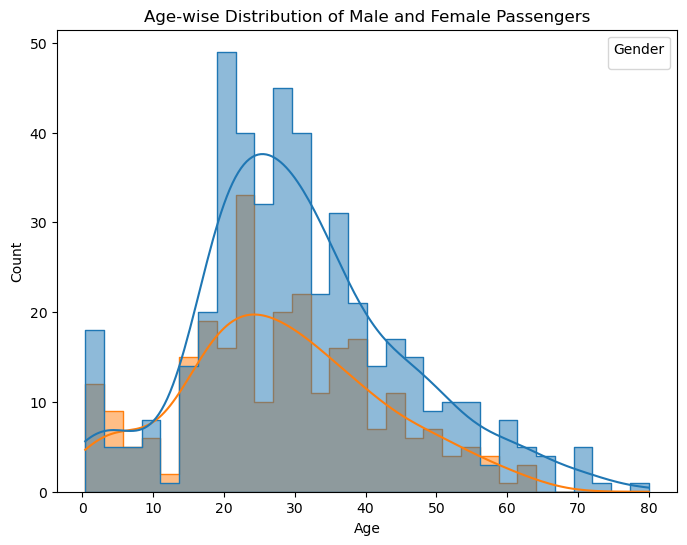

In [34]:
import seaborn as sns
plt.figure(figsize=(8, 6))

# Plot KDE distribution of age for male and female passengers
sns.histplot(df, x='Age', hue='Sex', bins=30, kde=True, element='step', alpha=0.5)

# Title and labels
plt.title('Age-wise Distribution of Male and Female Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title="Gender")

# Show plot
plt.show()

# Histogram of Age of the given data set(sample)

<Axes: title={'center': 'Age Distribution of Male Passengers'}, ylabel='Frequency'>

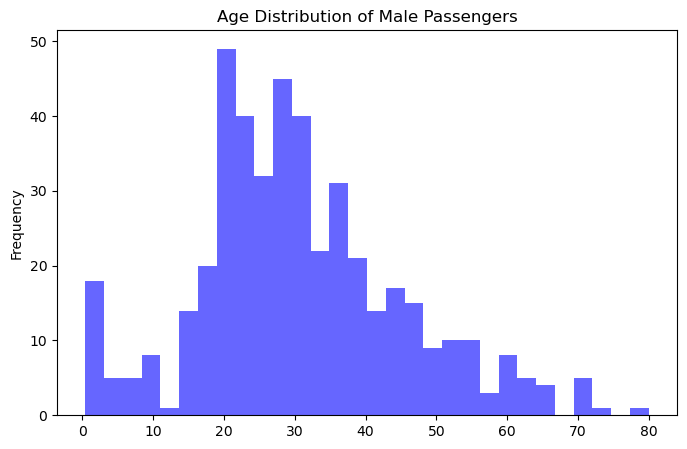

In [35]:
# Drop NaN values in the Age column
titanic = df.dropna(subset=['Age'])

# Plot Age Distribution for Male Passengers
titanic[titanic['Sex'] == 'male']['Age'].plot(
    kind='hist', bins=30, alpha=0.6, color='blue', title="Age Distribution of Male Passengers", figsize=(8, 5)
)





<Axes: title={'center': 'Age Distribution of Female Passengers'}, ylabel='Frequency'>

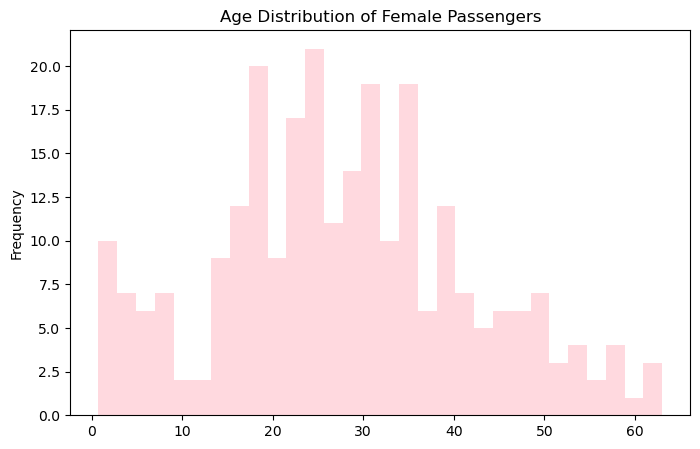

In [36]:
# Plot Age Distribution for Female Passengers
titanic[titanic['Sex'] == 'female']['Age'].plot(
    kind='hist', bins=30, alpha=0.6, color='pink', title="Age Distribution of Female Passengers", figsize=(8, 5)
)

## Handling Missing Values

In [37]:
df=pd.read_csv("train_titanic.csv")

## Replace the missing values in Embarked column by 'S'



In [38]:
df['Embarked'].fillna('S', inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Impute the missing values in Fare column with median value


In [39]:
df['Fare'].fillna(titanic['Fare'].median(), inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Impute the Age column. It has too many missing values but it may be important. 
## We fill the missing values with numbers randomly drawn from distribution
## that has same mean and standard deviation as non missing Age data

In [40]:
mean_age = df['Age'].mean()
std_age = df['Age'].std()

# Count missing values
num_missing = df['Age'].isna().sum()
print(num_missing)

# Generate random ages from normal distribution
random_ages = np.random.normal(loc=mean_age, scale=std_age, size=num_missing)

print("random ages drawn from normal distribution", random_ages)

# Fill missing Age values with generated random values
df.loc[df['Age'].isnull(), 'Age'] = random_ages

# Verify if missing values are replaced
print(titanic['Age'].isnull().sum()) 
 32.0806795  34.18183679 32.82263317 19.6600916  43.77590783 34.67682898
  1.25016803  2.3164136  27.79256796 33.22909006 36.29843469 25.53138774

177
random ages drawn from normal distribution [26.10206956 37.41011506 23.7139598  42.33356699 29.46123288 19.38531322
 28.13377422 40.80631009 39.62421103 38.82221344 -2.6211323  35.18592236
 44.28988965 31.57794376 47.03355348 16.34967075 42.33920129 58.37185643
 32.0806795  34.18183679 32.82263317 19.6600916  43.77590783 34.67682898
  1.25016803  2.3164136  27.79256796 33.22909006 36.29843469 25.53138774
 31.33773228 14.37220599  5.09624164 33.750898   41.70805754 17.6047698
 22.16717965 31.43157388 15.01264153 46.81851041  9.32489346 -5.42096732
 37.71724317 32.42430992 33.10947457 26.4420989  54.05098343  6.72455423
 44.00013357 27.40014917  6.89439469 28.43675054 18.69393547 27.42840823
 42.57896177 24.87143536 10.48607217 22.32419557 28.90361125 -8.34231363
 40.91422783  6.88219561 10.78080037 38.62979158  9.17648788 48.48581449
 15.50741821  8.33755905 30.35820353 22.01900483 22.81230517 56.30068233
  2.49937542 18.7174393  22.61585087 27.33508699 29.63607795 39.40964195
 39.8

## Feature Engineering - Creating new features

## Create and add a new feature FamilySize as a combination of SibSp and Parch
## FamilySize = Parch + SibSp + 1

In [41]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Display the first few rows to verify
print(df[['SibSp', 'Parch', 'FamilySize']].head())

   SibSp  Parch  FamilySize
0      1      0           2
1      1      0           2
2      0      0           1
3      1      0           2
4      0      0           1


## Create new feature IsAlone from FamilySize
## If FamilySize == 1 then IsAlone = True else IsAlone = False

In [42]:
df['IsAlone'] = df['FamilySize'] == 1  # Will store True if FamilySize is 1, else False

# Display the first few rows to verify
print(df[['FamilySize', 'IsAlone']].head())

   FamilySize  IsAlone
0           2    False
1           2    False
2           1     True
3           2    False
4           1     True


## Create a new attribute Has_cabin using the attribue Cabin. 
## if Cabin == NaN the Has_cabin = False else Has_cabin = True


In [43]:
df['Has_cabin'] = df['Cabin'].notna()

# Display the first few rows to verify
print(df[['Cabin', 'Has_cabin']].head())

  Cabin  Has_cabin
0   NaN      False
1   C85       True
2   NaN      False
3  C123       True
4   NaN      False



## Drop the columns which may not be useful in prediction of survival
## Drop PassengerId, Name, Ticket, and Cabin

In [44]:
# Drop the specified columns
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

# Display the first few rows to verify
print(df.head())

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  FamilySize  \
0         0       3    male  22.0      1      0   7.2500        S           2   
1         1       1  female  38.0      1      0  71.2833        C           2   
2         1       3  female  26.0      0      0   7.9250        S           1   
3         1       1  female  35.0      1      0  53.1000        S           2   
4         0       3    male  35.0      0      0   8.0500        S           1   

   IsAlone  Has_cabin  
0    False      False  
1    False       True  
2     True      False  
3    False       True  
4     True      False  


## Model Building

## Prepare X and y

In [45]:
X = df[ ["Pclass", "Sex", "Age", "SibSp", "Parch", "Embarked", "FamilySize", "IsAlone", "Has_cabin"]]
X

,Pclass,Sex,Age,SibSp,Parch,Embarked,FamilySize,IsAlone,Has_cabin
0,3,male,22.000000,1,0,S,2,False,False
1,1,female,38.000000,1,0,C,2,False,True
2,3,female,26.000000,0,0,S,1,True,False
3,1,female,35.000000,1,0,S,2,False,True
4,3,male,35.000000,0,0,S,1,True,False
...,...,...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,S,1,True,False
887,1,female,19.000000,0,0,S,1,True,True
888,3,female,71.073697,1,2,S,4,False,False
889,1,male,26.000000,0,0,C,1,True,True


In [46]:
y = df["Survived"]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Label encoding of categorical features


In [47]:
# concat df_categorical with original df

from sklearn.preprocessing import LabelEncoder

# Create LabelEncoder instance
labelencoder = LabelEncoder()

# Encode 'Sex' column
X["Sex"] = labelencoder.fit_transform(X["Sex"])

# Encode 'Embarked' column
X["Embarked"] = labelencoder.fit_transform(X["Embarked"])

X.head()

/tmp/ipykernel_3854/4059544942.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Sex"] = labelencoder.fit_transform(X["Sex"])
/tmp/ipykernel_3854/4059544942.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Embarked"] = labelencoder.fit_transform(X["Embarked"])


,Pclass,Sex,Age,SibSp,Parch,Embarked,FamilySize,IsAlone,Has_cabin
0,3,1,22.0,1,0,2,2,False,False
1,1,0,38.0,1,0,0,2,False,True
2,3,0,26.0,0,0,2,1,True,False
3,1,0,35.0,1,0,2,2,False,True
4,3,1,35.0,0,0,2,1,True,False


In [48]:
#Do a pairplot of all features

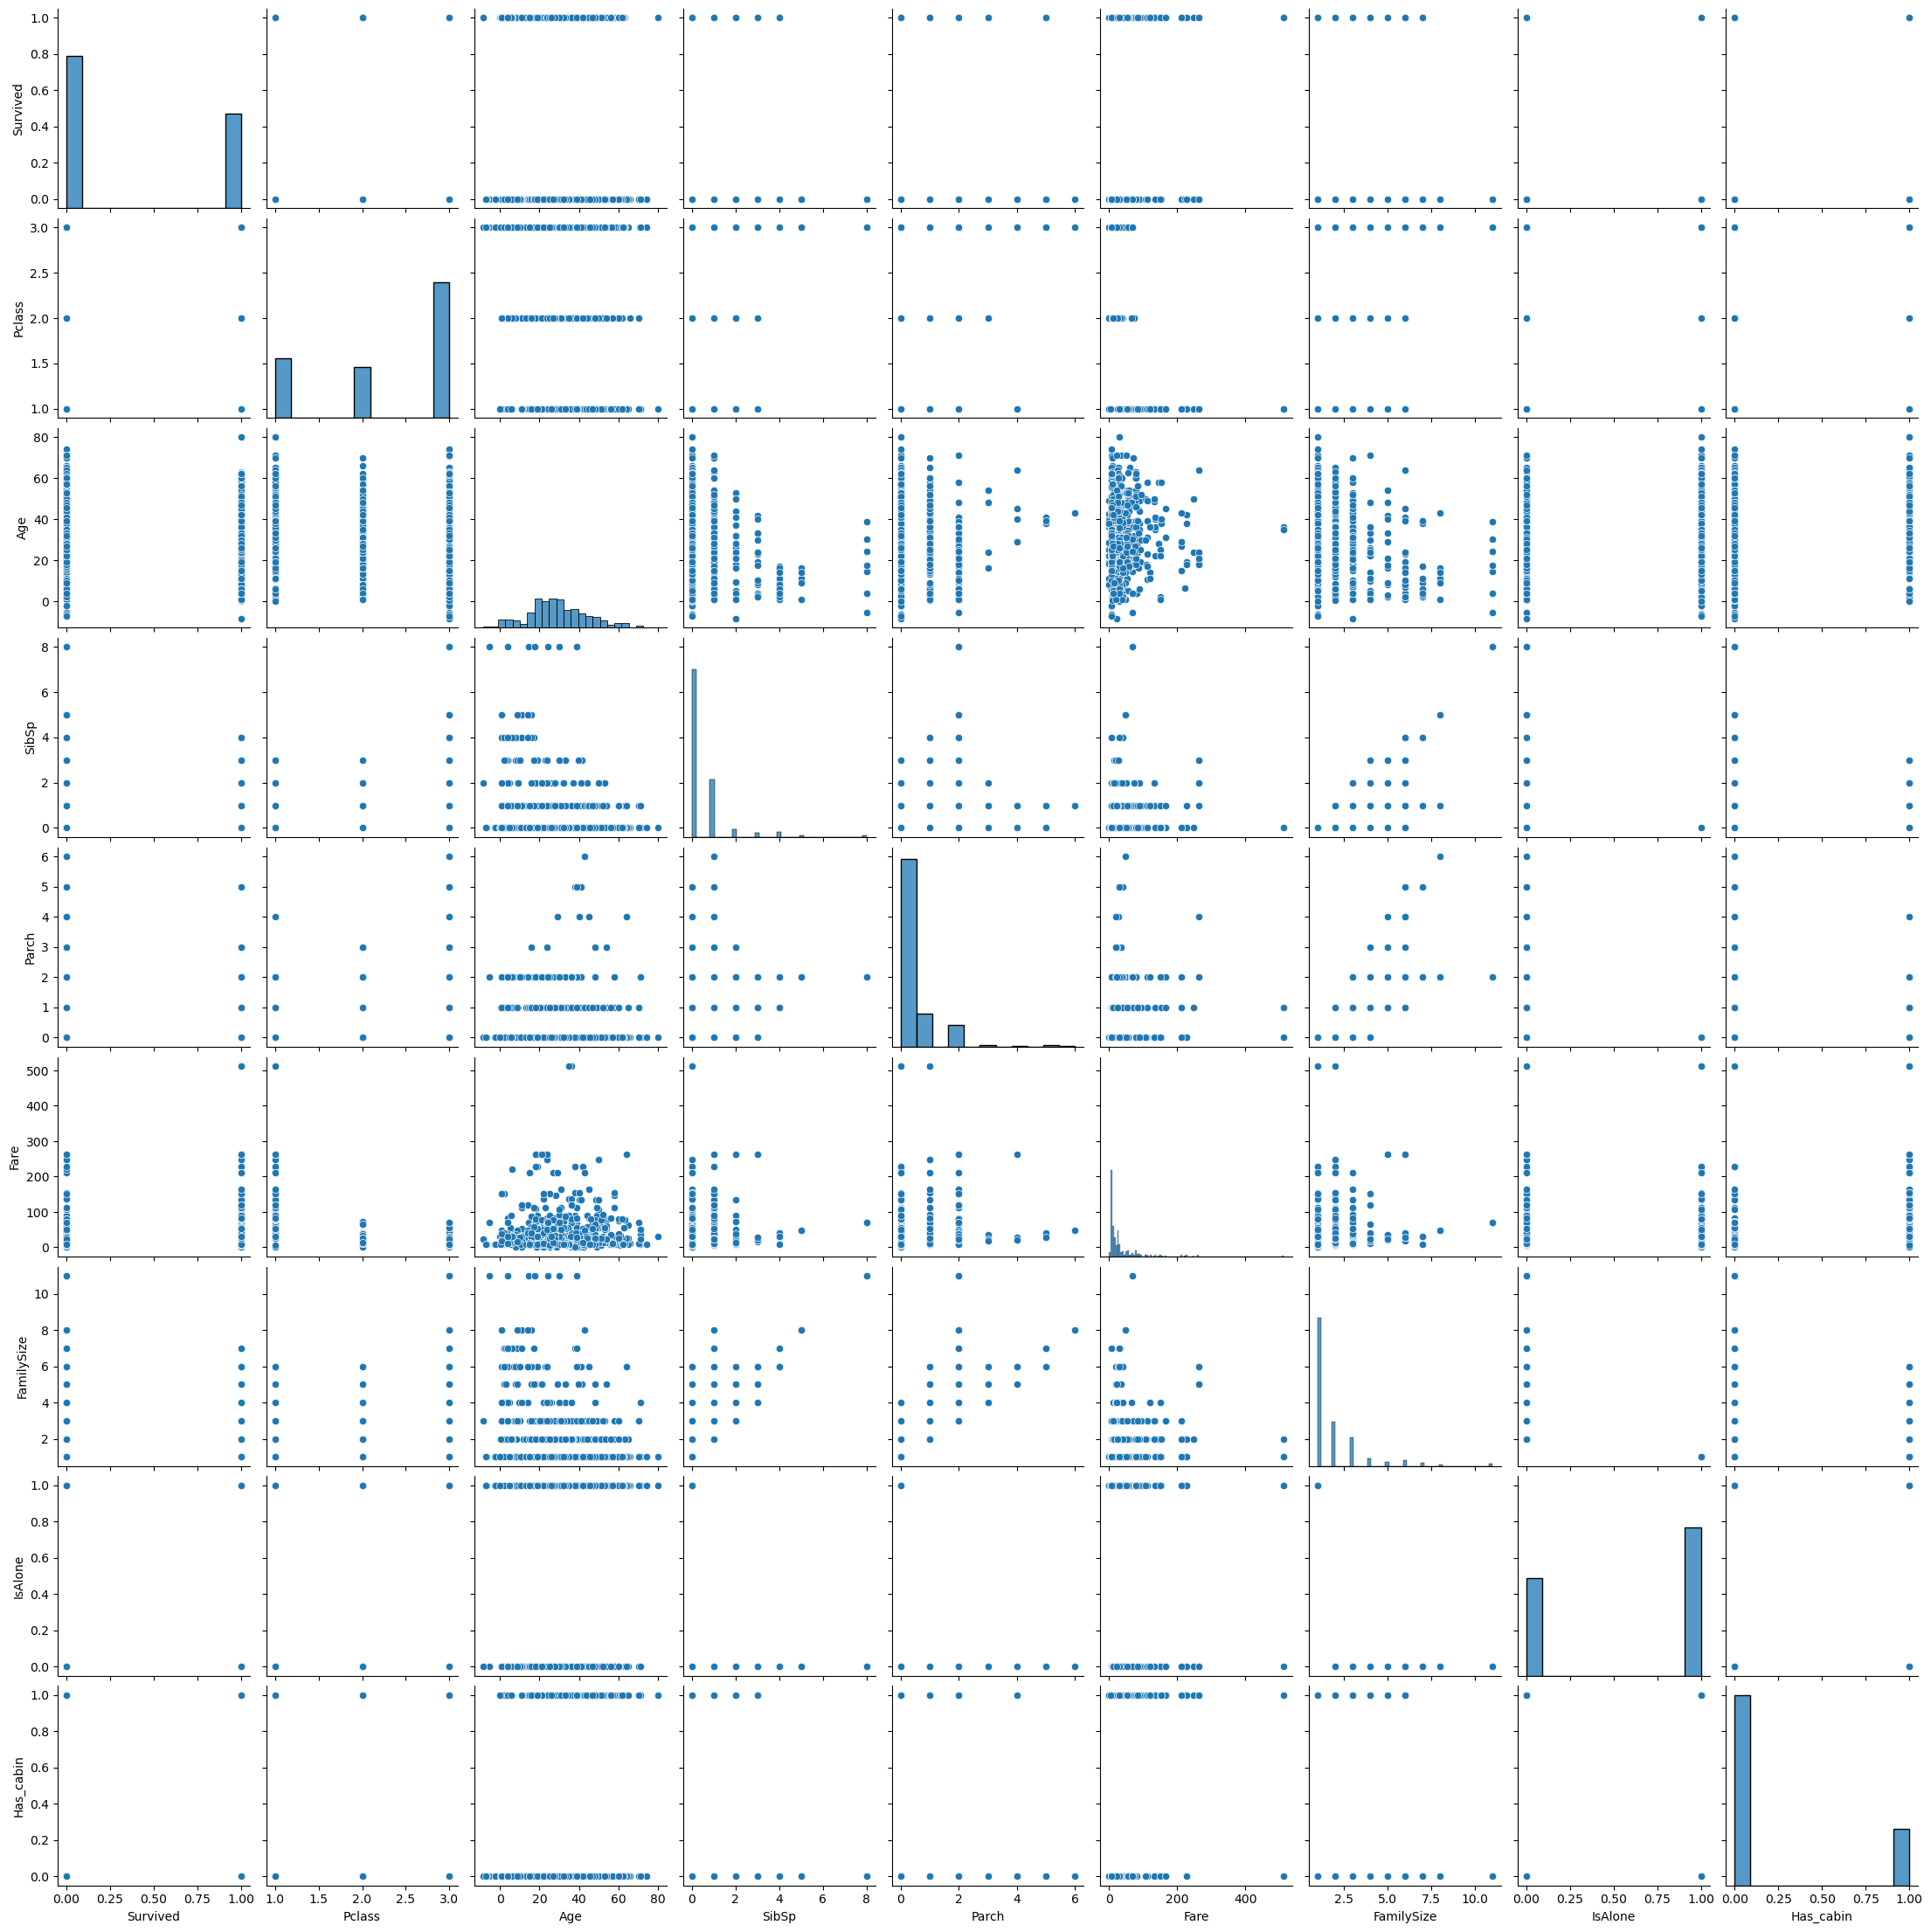

In [49]:
import seaborn as sns
sns.pairplot(df)

In [50]:
# Splitting the data into train and validation set - 90% train 10% validation
# X_train, X_test, y_train, y_validation
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [51]:
# Create the model
# Fitting the decision tree with default hyperparameters
# Importing decision tree classifier from sklearn library

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3)

In [53]:
from sklearn.tree import export_text

# Print the decision tree in text format
tree_rules = export_text(tree, feature_names=list(X.columns))
print(tree_rules)


|--- Sex <= 0.50
|   |--- Pclass <= 2.50
|   |   |--- Age <= 3.00
|   |   |   |--- class: 0
|   |   |--- Age >  3.00
|   |   |   |--- class: 1
|   |--- Pclass >  2.50
|   |   |--- FamilySize <= 4.50
|   |   |   |--- class: 1
|   |   |--- FamilySize >  4.50
|   |   |   |--- class: 0
|--- Sex >  0.50
|   |--- Has_cabin <= 0.50
|   |   |--- Age <= 3.50
|   |   |   |--- class: 0
|   |   |--- Age >  3.50
|   |   |   |--- class: 0
|   |--- Has_cabin >  0.50
|   |   |--- Age <= 6.11
|   |   |   |--- class: 1
|   |   |--- Age >  6.11
|   |   |   |--- class: 0



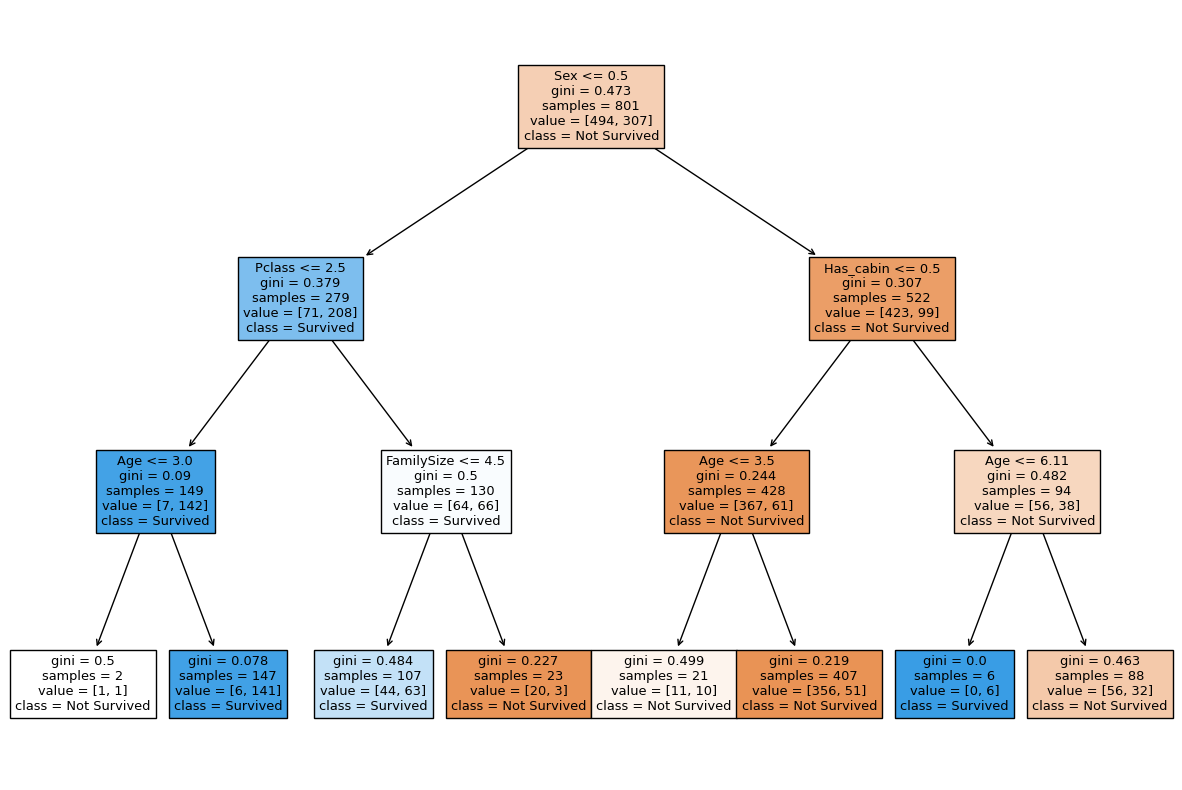

In [54]:
# Print the tree

from sklearn.tree import plot_tree

# Set figure size
plt.figure(figsize=(15, 10))

# Plot the tree
plot_tree(tree, feature_names=X.columns, class_names=["Not Survived", "Survived"], filled=True)

# Show the plot
plt.show()

# Importing required packages for visualization


In [55]:
# plotting tree with max_depth=3

<img src="tree2.png">

## Check the evaluation metrics of our default model on validation set - Confusion Matrix, Accuracy, Precision, Recall, F1 score

## Importing classification report and confusion matrix from sklearn metrics

## Making predictions

## Printing classification report

In [56]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Make predictions on the validation set
y_pred = tree.predict(x_test)

# Compute and print the Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Compute Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

# Print Classification Report (Precision, Recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[49  6]
 [10 25]]

Accuracy: 0.8222

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        55
           1       0.81      0.71      0.76        35

    accuracy                           0.82        90
   macro avg       0.82      0.80      0.81        90
weighted avg       0.82      0.82      0.82        90



## Printing confusion matrix and accuracy

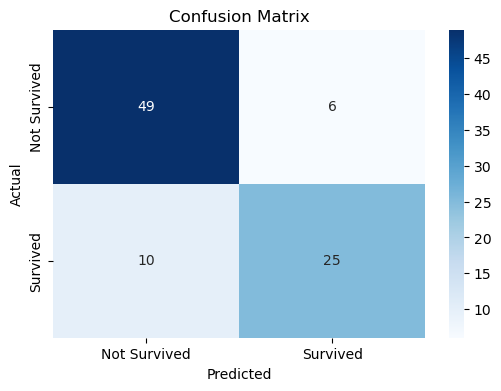

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate predictions
y_pred = tree.predict(x_test)

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [58]:
y_pred

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0])